In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('for_ml_model.csv')

In [3]:
df

,appid,Game,review,voted_up,release_date,english,developer,publisher,achievements,recommended,...,tw_Unnamed: 0,tw_Rank,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,tw_Avg_viewers,tw_Avg_channels,tw_Avg_viewer_ratio
0,20,team fortress classic,28.0,0.785714,1999-04-01,1,Valve,Valve,0,0,...,384991,5556,11940,3960,11,2,9,0,0,3.02
1,20,team fortress classic,28.0,0.678571,1999-04-01,1,Valve,Valve,0,0,...,277517,5741,8340,4260,10,2,17,0,0,1.96
2,20,team fortress classic,19.0,0.789474,1999-04-01,1,Valve,Valve,0,0,...,671313,4907,8700,4260,17,2,16,0,0,2.04
3,20,team fortress classic,18.0,0.611111,1999-04-01,1,Valve,Valve,0,0,...,2271,2972,12900,6480,70,2,13,0,0,1.99
4,20,team fortress classic,26.0,0.846154,1999-04-01,1,Valve,Valve,0,0,...,758661,3796,13500,3420,36,2,9,0,0,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38015,313120,stranded deep,295.0,0.756757,2015-01-23,1,Beam Team Games,Beam Team Pty Ltd,8,1,...,468740,362,30863160,2123460,24871,142,6335,692,47,14.53
38016,313120,stranded deep,187.0,0.802139,2015-01-23,1,Beam Team Games,Beam Team Pty Ltd,8,1,...,360056,2721,4200600,943920,742,66,2729,104,23,4.45
38017,738060,freddy fazbears pizzeria simulator,1.0,1.000000,2017-12-04,1,Scott Cawthon,Scott Cawthon,0,1,...,915026,1562,688020,79560,1699,15,603,15,1,8.65
38018,738060,freddy fazbears pizzeria simulator,1.0,1.000000,2017-12-04,1,Scott Cawthon,Scott Cawthon,0,1,...,253956,4080,255420,69960,230,10,500,5,1,3.65


In [4]:
list(df.columns)

['appid',
 'Game',
 'review',
 'voted_up',
 'release_date',
 'english',
 'developer',
 'publisher',
 'achievements',
 'recommended',
 '2d',
 'action',
 'adventure',
 'atmospheric',
 'casual',
 'co_op',
 'difficult',
 'fps',
 'first_person',
 'funny',
 'great_soundtrack',
 'indie',
 'multiplayer',
 'open_world',
 'rpg',
 'sandbox',
 'sci_fi',
 'shooter',
 'simulation',
 'singleplayer',
 'story_rich',
 'strategy',
 'survival',
 'third_person',
 'year',
 'month',
 'gamename',
 'avg',
 'gain',
 'peak',
 'avg_peak_perc',
 'windows',
 'mac',
 'linux',
 'tw_Unnamed: 0',
 'tw_Rank',
 'tw_Hours_watched',
 'tw_Hours_Streamed',
 'tw_Peak_viewers',
 'tw_Peak_channels',
 'tw_Streamers',
 'tw_Avg_viewers',
 'tw_Avg_channels',
 'tw_Avg_viewer_ratio']

In [5]:
df.drop(['tw_Unnamed: 0'], axis=1, inplace=True)

In [6]:
df['viewer_ratio_lagged'] = df.groupby(['appid'])['tw_Avg_viewer_ratio'].shift(-1)

In [7]:
df['viewer_ratio_level'] = df['viewer_ratio_lagged'].apply(lambda x : 1 if x>35 else 0)

In [8]:
np.percentile(list(df.groupby('publisher')['appid'].nunique()), 90)

3.0

In [9]:
df['big_publisher'] = df.groupby('publisher')['appid'].transform('nunique')

In [10]:
df['big_publisher'] = df['big_publisher'].apply(lambda x : 1 if x >3 else 0)

In [11]:
genre = [ '2d',
 'action',
 'adventure',
 'atmospheric',
 'casual',
 'co_op',
 'difficult',
 'fps',
 'first_person',
 'funny',
 'great_soundtrack',
 'indie',
 'multiplayer',
 'open_world',
 'rpg',
 'sandbox',
 'sci_fi',
 'shooter',
 'simulation',
 'singleplayer',
 'story_rich',
 'strategy',
 'survival',
 'third_person']
basics = ['review','voted_up','recommended','achievements','avg','gain','mac','linux','big_publisher','viewer_ratio_level']
variables = genre + basics

In [12]:
df_ml = df[variables].dropna()

In [13]:
for i in genre:
    df_ml[i] = df_ml[i].apply(lambda x : 1 if x>0 else 0)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf


In [15]:
df_ml

,2d,action,adventure,atmospheric,casual,co_op,difficult,fps,first_person,funny,...,review,voted_up,recommended,achievements,avg,gain,mac,linux,big_publisher,viewer_ratio_level
0,0,1,1,0,0,1,0,1,1,1,...,28.0,0.785714,0,0,70.16,-2.03,1,1,1,0
1,0,1,1,0,0,1,0,1,1,1,...,28.0,0.678571,0,0,69.93,-0.23,1,1,1,0
2,0,1,1,0,0,1,0,1,1,1,...,19.0,0.789474,0,0,63.04,-6.89,1,1,1,0
3,0,1,1,0,0,1,0,1,1,1,...,18.0,0.611111,0,0,60.49,-2.55,1,1,1,0
4,0,1,1,0,0,1,0,1,1,1,...,26.0,0.846154,0,0,59.40,-1.09,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38015,0,1,1,1,0,1,0,0,1,0,...,295.0,0.756757,1,8,747.84,205.91,1,1,0,0
38016,0,1,1,1,0,1,0,0,1,0,...,187.0,0.802139,1,8,542.77,-205.06,1,1,0,0
38017,0,0,1,1,0,0,1,0,1,1,...,1.0,1.000000,1,0,114.97,9.19,0,0,1,0
38018,0,0,1,1,0,0,1,0,1,1,...,1.0,1.000000,1,0,108.30,-6.66,0,0,1,0


In [16]:
y=df_ml.viewer_ratio_level

In [17]:
X=df_ml.drop(columns=['viewer_ratio_level'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()

In [20]:
X_scaler = scaler.fit(X_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

rf_model = rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.906


In [23]:
predictions = rf_model.predict(X_test_scaled)

In [24]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,8381,165
Actual 1,731,228


In [25]:
acc_score = accuracy_score(y_test, predictions)
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8381,165
Actual 1,731,228


Accuracy Score : 0.9057338243029984
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8546
           1       0.58      0.24      0.34       959

    accuracy                           0.91      9505
   macro avg       0.75      0.61      0.64      9505
weighted avg       0.89      0.91      0.89      9505



In [26]:
import time
import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.028 seconds


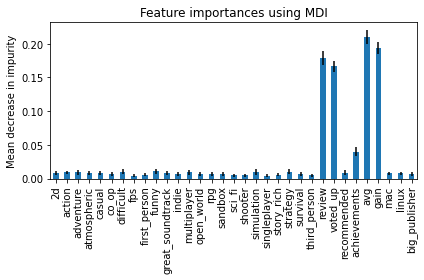

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_train.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [28]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
892/892 [==============================] - 2s 2ms/step - loss: 0.3319 - accuracy: 0.8849
Epoch 2/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2920 - accuracy: 0.9003
Epoch 3/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2832 - accuracy: 0.9032
Epoch 4/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2768 - accuracy: 0.9069
Epoch 5/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2720 - accuracy: 0.9087
Epoch 6/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2695 - accuracy: 0.9092
Epoch 7/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2667 - accuracy: 0.9097
Epoch 8/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2653 - accuracy: 0.9097
Epoch 9/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2640 - accuracy: 0.9100
Epoch 10/100
892/892 [==============================] - 2s 2ms/step - loss: 0.2627 - accura

In [33]:
predictions = nn.predict_classes(X_test_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [35]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

acc_score = accuracy_score(y_test, predictions)
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8467,79
Actual 1,791,168


Accuracy Score : 0.9084692267227775
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8546
           1       0.68      0.18      0.28       959

    accuracy                           0.91      9505
   macro avg       0.80      0.58      0.61      9505
weighted avg       0.89      0.91      0.88      9505



In [28]:
nn.metrics_names

['loss', 'accuracy']

In [34]:
df.Avg_viewer_ratio.quantile(.70)

34.92999999999999